# K-means clustering & PCA

**Problem formulation**
In this example, we want to create a Segmentation with customers who behave the same

- We want to investigate what are the common traits / behaviours in each Segment / Cluster

- We want to deploy our results in Power BI for the business to use

- We want to automate all this process for future data

**Importing / Installing packages**

In [7]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# import sys
# !conda list Check the packages installed

**Loading the Raw Data into Python**

In [8]:
# Loading the data
df = pd.read_csv('C:\\Users\\Tuta\\Documents\\Biblioteca do Engenheiro\\Linguagem Computacional\\Python\\Data science\\Cluster de Clientes\\Customer Data.csv', sep='\t')

# print the shape
print(df.shape)

#runs the first 5 rows
df.head()

(14783, 20)


,Unnamed: 0,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


**Exploratory Data Analysis & Data Cleaning**

In [9]:
# Checking for null values

df.isnull().sum()

Unnamed: 0                                                        0
CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            5
How often you attend Entertaining events in a year?               5
Social_Media                                                      5
How many hours are you willing to travel to attend an event?      5
Do you enjoy adrenaline-rush activities?        

In [10]:
# Visualize the NULL observations


df[df['Total_Household_Income'].isnull()]

,Unnamed: 0,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
21,21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Deleting the NULL values
df = df.dropna(subset = ['Total_Household_Income'])

# Printing the shape
print(df.shape)

# Visualize the NULL observations
df.isnull().sum()

(14778, 20)


Unnamed: 0                                                        0
CUSTOMER                                                          0
Age                                                               0
Gender                                                            0
Postcode                                                          0
District                                                          0
Constituency                                                      0
latitude                                                          0
longitude                                                         0
Current_Status                                                    0
Total_Household_Income                                            0
How often you attend Entertaining events in a year?               0
Social_Media                                                      0
How many hours are you willing to travel to attend an event?      0
Do you enjoy adrenaline-rush activities?        

In [12]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Unnamed: 0 :14778
The number of values for feature CUSTOMER :14778
The number of values for feature Age :9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Postcode :14674
The number of values for feature District :225
The number of values for feature Constituency :358
The number of values for feature latitude :13242
The number of values for feature longitude :13262
The number of values for feature Current_Status :8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values for feature Total_Household_Income :8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The number of values for feature Ho

In [13]:
# Getting the columns we need

df.columns

Index(['Unnamed: 0', 'CUSTOMER', 'Age', 'Gender', 'Postcode', 'District',
       'Constituency', 'latitude', 'longitude', 'Current_Status',
       'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?'],
      dtype='object')

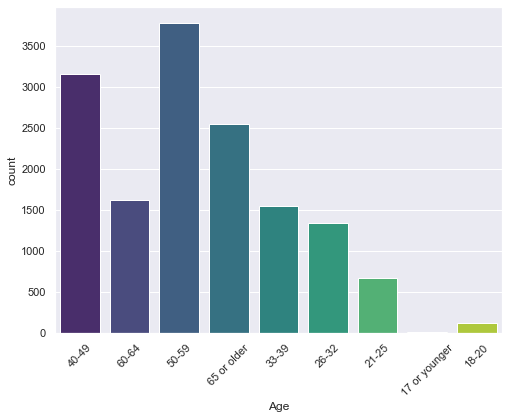

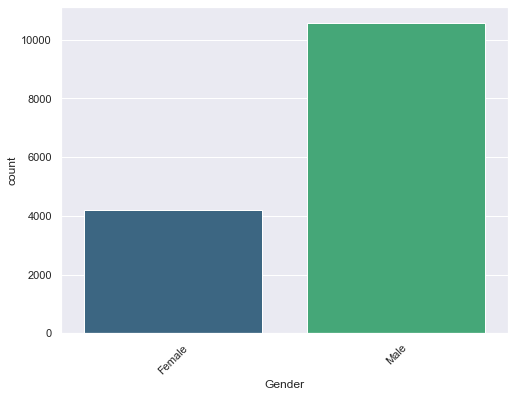

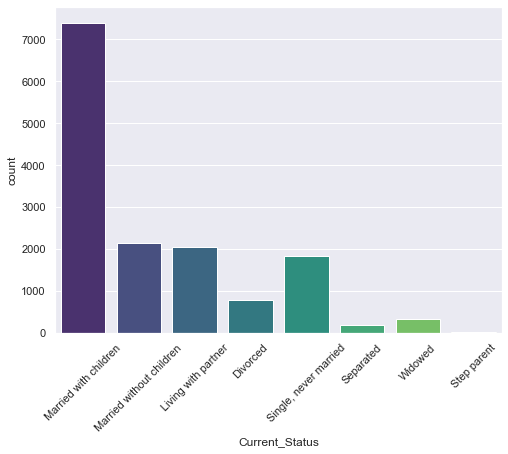

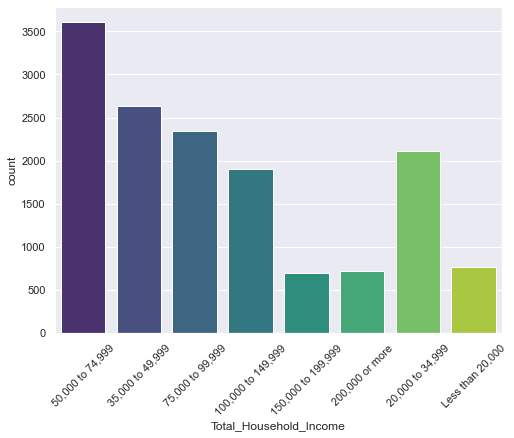

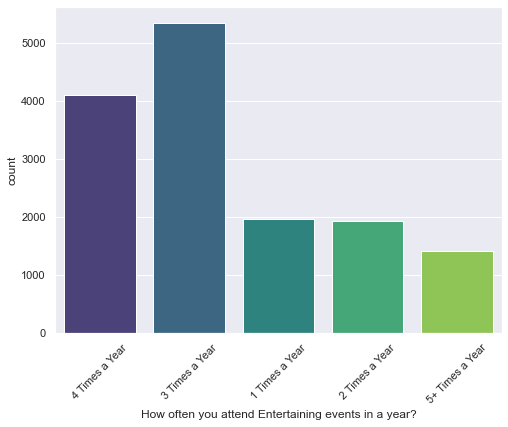

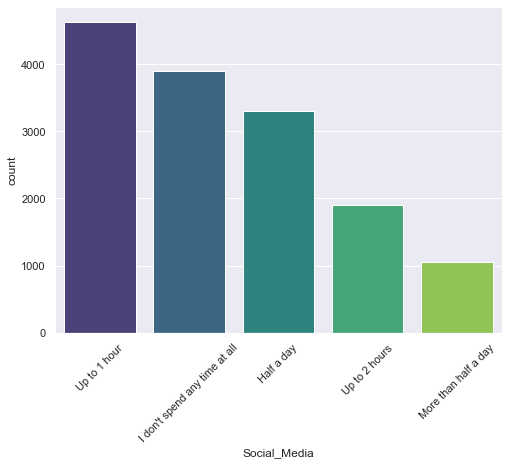

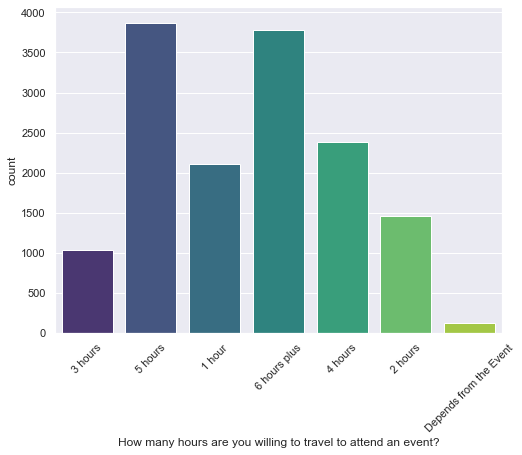

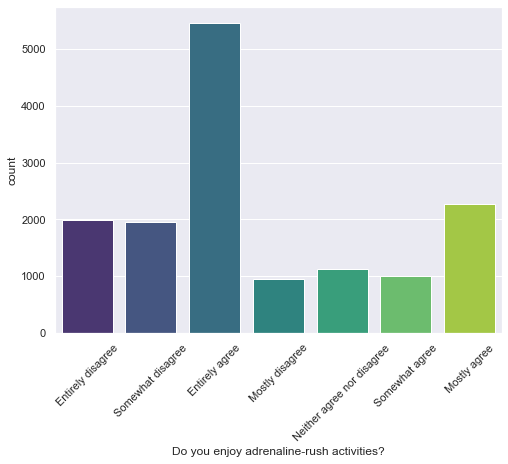

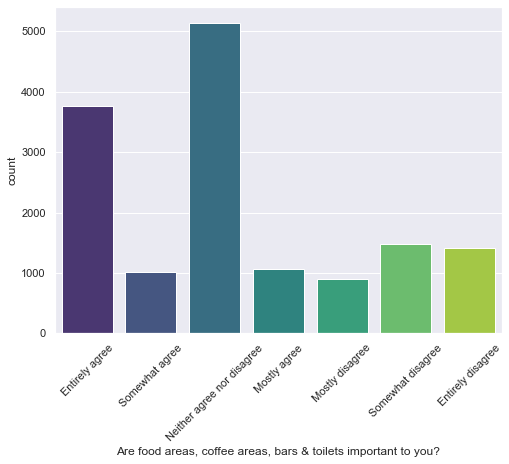

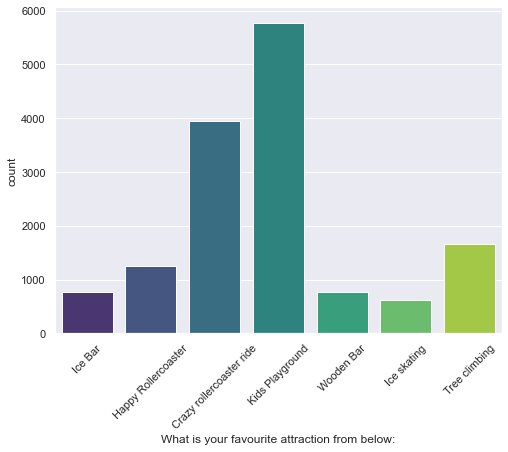

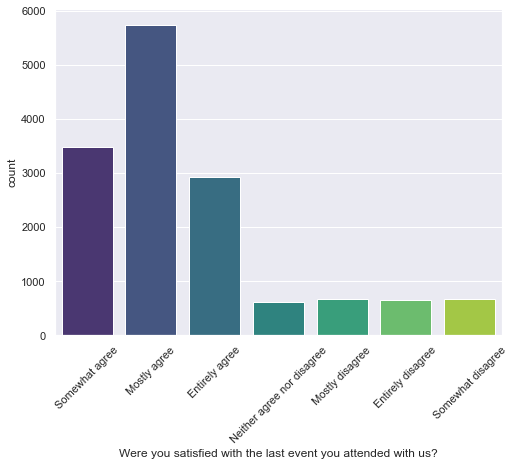

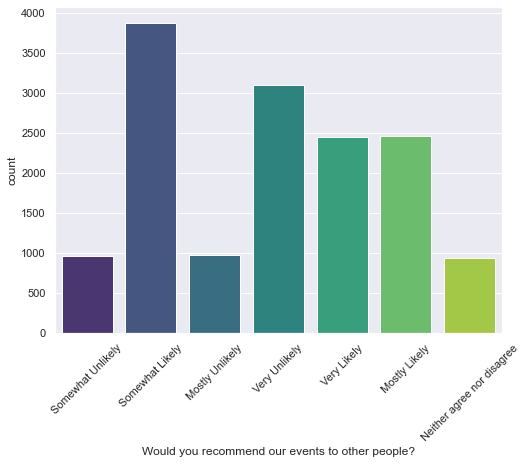

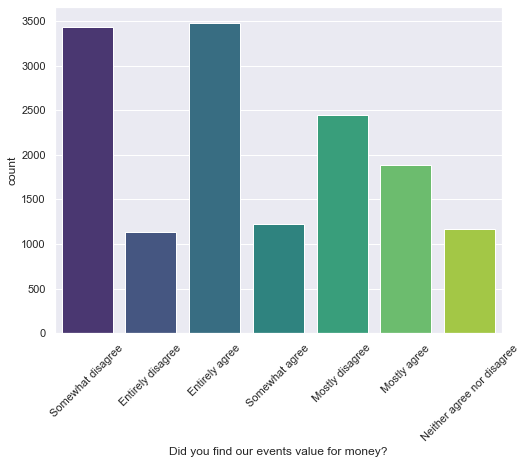

In [14]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Age', 'Gender','Current_Status', 'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?']

for f in features:
    sns.countplot(x = f, data = df, palette = 'viridis')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()

**Feature Engineering - Creating a distance metric**

In [15]:
def haversine_vectorize(lon1, lat1, lon2, lat2):
 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM, for miles use 3958
    return km

In [16]:
# Creating lat and long for our event - randoms

df['Event Lat'] = '51.5073'
df['Event Lon'] = '0.1657'


haversine_vectorize(df['Event Lon'].astype(float) ,df['Event Lat'].astype(float),df['longitude'].astype(float) ,
                   df['latitude'].astype(float))


df['Distance from Event'] = haversine_vectorize(df['Event Lon'].astype(float) ,df['Event Lat'].astype(float),df['longitude'].astype(float) ,
                   df['latitude'].astype(float))

**Feature Engineering - Numeric Representation**

In [17]:
# Making categorical variables into numeric representation

print(df.shape)

# keeping the columns we need - Drop the location columns for now, as we do not want them to impact our results (for now)
raw_data = df[features]
print(df.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(new_raw_data.shape)
# print the shape

new_raw_data.head()

(14778, 23)
(14778, 23)
(14778, 86)


,Age_17 or younger,Age_18-20,Age_21-25,Age_26-32,Age_33-39,Age_40-49,Age_50-59,Age_60-64,Age_65 or older,Gender_Female,...,Would you recommend our events to other people?_Somewhat Unlikely,Would you recommend our events to other people?_Very Likely,Would you recommend our events to other people?_Very Unlikely,Did you find our events value for money?_Entirely agree,Did you find our events value for money?_Entirely disagree,Did you find our events value for money?_Mostly agree,Did you find our events value for money?_Mostly disagree,Did you find our events value for money?_Neither agree nor disagree,Did you find our events value for money?_Somewhat agree,Did you find our events value for money?_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [18]:
raw_data.head()

,Age,Gender,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,40-49,Female,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,60-64,Male,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,50-59,Male,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,50-59,Female,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,60-64,Male,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


**K-means Clustering**

 More details in how K-means works here: https://youtu.be/4b5d3muPQmA

In [19]:
# Running Kmeans

X_train = new_raw_data.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [0 4 4 ... 0 1 4]
The Inertia is:  101900.26594116453


In [20]:
kmeans.labels_.shape

(14778,)

**What is Inertia:**

Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are. Inertia assumes that clusters are convex and isotropic; performs poorly elongated clusters, or manifolds with irregular shapes; better use hierarchical clustering here. Inertia also performs poorly in very high-dimensional spaces since Euclidean distances become inflated and no normalisation is applied beforehand; not a normalised metric.

In [21]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 125619.02972065956
The innertia for : 3 Clusters is: 114905.38684266769
The innertia for : 4 Clusters is: 106337.17594801619
The innertia for : 5 Clusters is: 100865.16529237527
The innertia for : 6 Clusters is: 96432.53526396498
The innertia for : 7 Clusters is: 93814.49897631761
The innertia for : 8 Clusters is: 91696.5751387624
The innertia for : 9 Clusters is: 89725.00222083252
The innertia for : 10 Clusters is: 88493.2291597932
The innertia for : 11 Clusters is: 87581.06059954739
The innertia for : 12 Clusters is: 86617.66608880102
The innertia for : 13 Clusters is: 85829.38420440158
The innertia for : 14 Clusters is: 85014.85271668121
The innertia for : 15 Clusters is: 84434.74381493371
The innertia for : 16 Clusters is: 83662.83564950599
The innertia for : 17 Clusters is: 82854.33711923532
The innertia for : 18 Clusters is: 82485.74994726614
The innertia for : 19 Clusters is: 82187.93372039542


In [22]:
no_of_clusters

range(2, 20)

Text(0.5, 1.0, 'Inertia Plot per k')

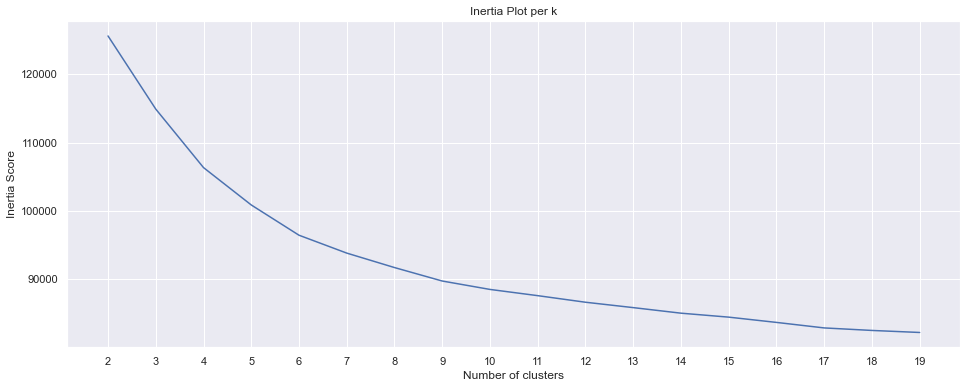

In [23]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='horizontal')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [24]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,2208,1226,8492,1865,987


In [25]:
kmeans.labels_

array([2, 2, 2, ..., 2, 0, 2])

In [26]:
predictions

array([2, 2, 2, ..., 2, 0, 2])

In [27]:
new_raw_data.shape

(14778, 86)

# Running Principal Component Analysis (PCA) to Visualize & improve results

**What is it?**

- PCA is a dimensionality reduction technique that transforms a number of possibly correlated variables into a smaller number of uncorrelated variables; called principal components

- The goal of PCA is to extract the most important information from the data table by compressing the size of the data set and keeping only the important information; then PCA computes new variables called principal components.

**Additional Info:**

- The first principal component is required to have the largest possible variance (inertia) and therefore this component will explain the largest part of the inertia / variance of the data table; hence the less principal components you have the lower the inertia will be after PCA.

- For every new component you add, the inertia will increase since the rotations are always performed in a subspace and the new axes will always explain less inertia than the original components; which are computed to be optimal

- Therefore, inertia should not be the criterium to choose the optimal number of principal component since the lower the components are the lower the inertia will be.

- 95% explained variance should be the criterium when choosing the number of principal components

 **Additional resources:**
 
 kmeans SK-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
 
 PCA SK-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
 
 PCA - How it works: https://youtu.be/FgakZw6K1QQ 
 
 How to compute PCA: https://youtu.be/fKivxsVlycs

Explained variance ratio by first two components: [0.167356 0.078177]
The total percentage of explanation of the dataset by first two components: 0.24553273662930197


<Figure size 576x432 with 0 Axes>

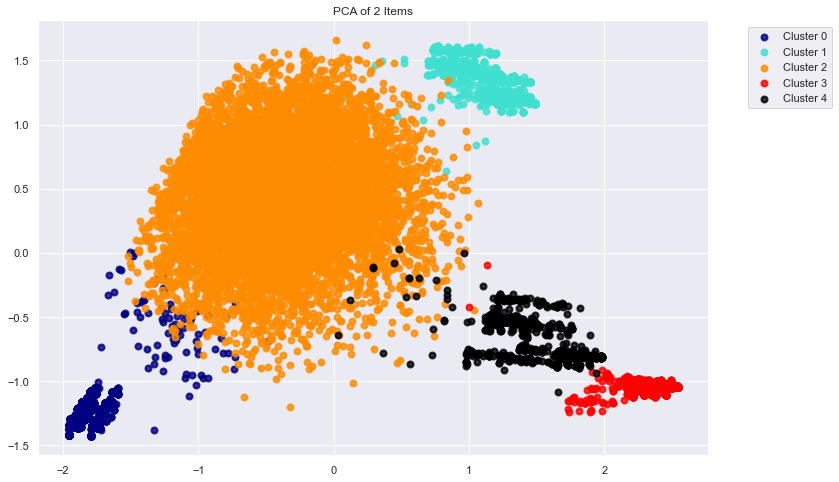

In [28]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

# Justi 2 components because we want to plot x and y graph
pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio by first two components: %s' % str(pca.explained_variance_ratio_))
print('The total percentage of explanation of the dataset by first two components: %s' % sum(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

**Why dimensionality reduction could help k-means perform better:**
    
- Kmeans is extremely sensitive to scale, and when you have a lot of attributes there is no true scale anymore. This is where PCA comes in since it whitens your data.

- By doing this, you will remove global correlation which can sometimes give better results. K-means is a "least squares" optimization problem; same with PCA.

- Kmeans tries to find the least squares partition of the data while PCA finds the least squares cluster membership vector. The first eigenvector has the largest variance (smallest inertia), hence splitting on this vector (which shows the cluster membership - not input data coordinates) means maximization of cluster variance; better fit for Kmeans.

- By maximizing between cluster variance, you minimize within-cluster variance. Therefore, applying PCA before clustering could potentially help you get better clusters (with more variance) in Kmeans

**Identifying the "best" number of components**

Total Variance in our dataset is:  9.789277508428556
The 95% variance we want to have is:  9.299813633007128

Variance explain with 30 n_compononets:  7.800063287617325
Variance explain with 35 n_compononets:  8.200059944222103
Variance explain with 40 n_compononets:  8.559358189926268
Variance explain with 41 n_compononets:  8.625206072416134
Variance explain with 50 n_compononets:  9.157222065601179
Variance explain with 53 n_compononets:  9.30180199758678
Variance explain with 55 n_compononets:  9.39152819059342
Variance explain with 60 n_compononets:  9.592274980903552


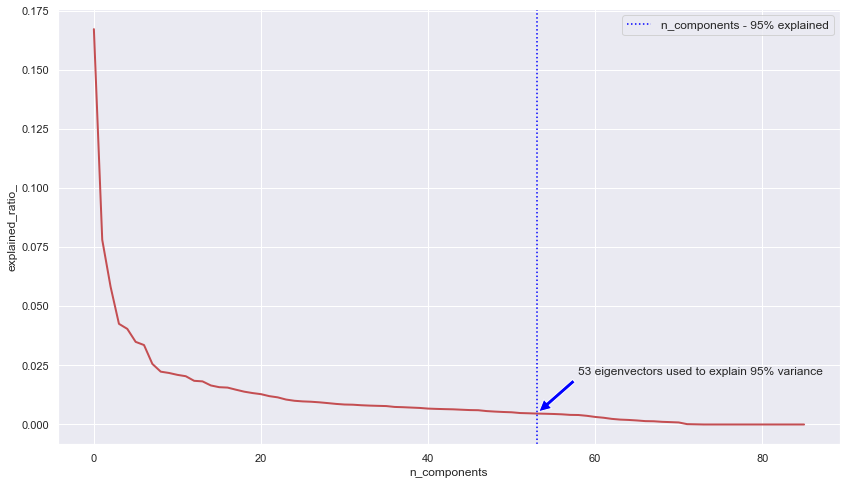

In [29]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(53,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('53 eigenvectors used to explain 95% variance', xy=(53, pca.explained_variance_ratio_[53]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 118418.00533440092
The innertia for : 3 Clusters is: 107706.73804798897
The innertia for : 4 Clusters is: 99150.89658689602
The innertia for : 5 Clusters is: 94717.71454592903
The innertia for : 6 Clusters is: 89259.98846975282
The innertia for : 7 Clusters is: 87032.31815907714
The innertia for : 8 Clusters is: 84734.2526517544
The innertia for : 9 Clusters is: 82901.43389425894
The innertia for : 10 Clusters is: 81675.79302907934
The innertia for : 11 Clusters is: 80363.07116110664
The innertia for : 12 Clusters is: 79645.57849749697
The innertia for : 13 Clusters is: 78836.55417592285
The innertia for : 14 Clusters is: 77765.06416907474
The innertia for : 15 Clusters is: 77471.39025517231
The innertia for : 16 Clusters is: 76646.93730762939
The innertia for : 17 Clusters is: 75782.7240216458
The innertia for : 18 Clusters is: 75256.95483848442
The innertia for : 19 Clusters is: 74707.75842734566


Text(0.5, 1.0, 'Inertia Plot per k')

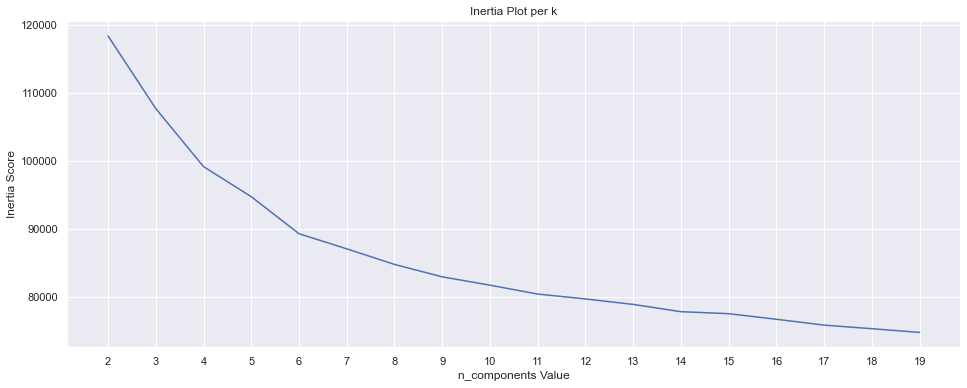

In [30]:
# Running PCA again

pca = PCA(n_components=53, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='horizontal')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

**Conclusion:**
    
- We managed to improve our results by reducing inertia

**Another way of "Improving" results Could* be to Clean/Combine Variables**

In [31]:
# Visualizing all of your variables / columns
new_raw_data.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How often you attend Entertaining events in a year?_1 Times a Year',
       'How often you attend Enterta

In [32]:
################################################################################################
########################## CLEAN/COMBINE VARIABLES TO IMPROVE RESULTS ##########################
################################################################################################

print("The shape is: ", new_raw_data.shape)

# Cleaning the "how_often_you_attend_entertaining_events_in_a_year" column

# 1-2 times
new_raw_data['How often you attend Entertaining events in a year?_1_or_2_Times'] = 0
new_raw_data['How often you attend Entertaining events in a year?_1_or_2_Times'][
            (new_raw_data['How often you attend Entertaining events in a year?_1 Times a Year'] == 1) |
            (new_raw_data['How often you attend Entertaining events in a year?_2 Times a Year'] == 1)] = 1

# 4-5 times
new_raw_data['How often you attend Entertaining events in a year?_4_or_more_Times'] = 0
new_raw_data['How often you attend Entertaining events in a year?_4_or_more_Times'][
            (new_raw_data['How often you attend Entertaining events in a year?_4 Times a Year'] == 1) | 
            (new_raw_data['How often you attend Entertaining events in a year?_5+ Times a Year'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "social_media" column

# half a day + more than half a day
new_raw_data['Social_Media_Less_Than_1_Hour_a_Day'] = 0
new_raw_data['Social_Media_Less_Than_1_Hour_a_Day'][
            (new_raw_data['Social_Media_Half a day'] == 1) | 
            (new_raw_data['Social_Media_More than half a day'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour" column

# 1 to 2 hours
new_raw_data['How many hours are you willing to travel to attend an event?_1_to_2_hours'] = 0
new_raw_data['How many hours are you willing to travel to attend an event?_1_to_2_hours'][
            (new_raw_data['How many hours are you willing to travel to attend an event?_1 hour'] == 1) | 
            (new_raw_data['How many hours are you willing to travel to attend an event?_2 hours'] == 1)] = 1

# 3 to 4 hours
new_raw_data['How many hours are you willing to travel to attend an event?_3_to_4_hours'] = 0
new_raw_data['How many hours are you willing to travel to attend an event?_3_to_4_hours'][
            (new_raw_data['How many hours are you willing to travel to attend an event?_3 hours'] == 1) | 
            (new_raw_data['How many hours are you willing to travel to attend an event?_4 hours'] == 1)] = 1

# 5 to 6 hours
new_raw_data['How many hours are you willing to travel to attend an event?_5_or_more_hours'] = 0
new_raw_data['How many hours are you willing to travel to attend an event?_5_or_more_hours'][
            (new_raw_data['How many hours are you willing to travel to attend an event?_5 hours'] == 1) | 
            (new_raw_data['How many hours are you willing to travel to attend an event?_6 hours plus'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "do_you_enjoy_adrenaline_rush_activities" column

# Mostly & Entirely Agree
new_raw_data['Do you enjoy adrenaline-rush activities?__Entirely_or_Mostly agree'] = 0
new_raw_data['Do you enjoy adrenaline-rush activities?__Entirely_or_Mostly agree'][
            (new_raw_data['Do you enjoy adrenaline-rush activities?_Somewhat agree'] == 1) | 
            (new_raw_data['Do you enjoy adrenaline-rush activities?_Mostly agree'] == 1)] = 1

# Mostly & Entirely Disagree
new_raw_data['Do you enjoy adrenaline-rush activities?__Entirely_or_Mostly disagree'] = 0
new_raw_data['Do you enjoy adrenaline-rush activities?__Entirely_or_Mostly disagree'][
            (new_raw_data['Do you enjoy adrenaline-rush activities?_Entirely disagree'] == 1) | 
            (new_raw_data['Do you enjoy adrenaline-rush activities?_Mostly disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

The shape is:  (14778, 86)
The shape is:  (14778, 88)
The shape is:  (14778, 89)
The shape is:  (14778, 92)
The shape is:  (14778, 94)


<ipython-input-32-de6a19b0c118>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['How often you attend Entertaining events in a year?_1_or_2_Times'][
<ipython-input-32-de6a19b0c118>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['How often you attend Entertaining events in a year?_4_or_more_Times'][
<ipython-input-32-de6a19b0c118>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['Social_Media

In [33]:
# Cleaning the "are_food_areas_coffee_areas_bars_toilets_important_to_you" column

# Mostly & Somewhat Agree
new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Entirely_Mostly agree'] = 0
new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Entirely_Mostly agree'][
            (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly agree'] == 1) | 
            (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Entirely agree'] == 1)] = 1


# Mostly & entirely Disagree
new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Entirely_Mostly disagree'] = 0
new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Entirely_Mostly disagree'][ 
            (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Mostly disagree'] == 1) | 
            (new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Entirely disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)



# Cleaning the "Would you recommend our events to other people" column

# Entirely & Mostly Likely
new_raw_data['Would you recommend our events to other people?_Very_Mostly Likely'] = 0
new_raw_data['Would you recommend our events to other people?_Very_Mostly Likely'][
            (new_raw_data['Would you recommend our events to other people?_Mostly Likely'] == 1) | 
            (new_raw_data['Would you recommend our events to other people?_Very Likely'] == 1)] = 1

# Entirely & Mostly Unlikely
new_raw_data['Would you recommend our events to other people?_Very_Mostly Unlikely'] = 0
new_raw_data['Would you recommend our events to other people?_Very_Mostly Unlikely'][
            (new_raw_data['Would you recommend our events to other people?_Mostly Unlikely'] == 1) | 
            (new_raw_data['Would you recommend our events to other people?_Very Unlikely'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "Were you satisfied with the last event you attended with us?" column

# Mostly & Entirely Agree
new_raw_data['Were you satisfied with the last event you attended with us?_Mostly_Entirely agree'] = 0
new_raw_data['Were you satisfied with the last event you attended with us?_Mostly_Entirely agree'][ 
            (new_raw_data['Were you satisfied with the last event you attended with us?_Mostly agree'] == 1) | 
            (new_raw_data['Were you satisfied with the last event you attended with us?_Entirely agree'] == 1)] = 1

# Mostly & Entirely Disagree
new_raw_data['Were you satisfied with the last event you attended with us?_Mostly_Entirely disagree'] = 0
new_raw_data['Were you satisfied with the last event you attended with us?_Mostly_Entirely disagree'][ 
            (new_raw_data['Were you satisfied with the last event you attended with us?_Mostly disagree'] == 1) | 
            (new_raw_data['Were you satisfied with the last event you attended with us?_Entirely disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "did_you_find_our_events_value_for_money" column

# Mostly & Somewhat agree
new_raw_data['Did you find our events value for money?_Entirely_Mostrly agree'] = 0
new_raw_data['Did you find our events value for money?_Entirely_Mostrly agree'][
            (new_raw_data['Did you find our events value for money?_Entirely agree'] == 1) | 
            (new_raw_data['Did you find our events value for money?_Mostly agree'] == 1)] = 1

# Mostly & Somewhat disagree
new_raw_data['Did you find our events value for money?_Entirely_Mostrly disagree'] = 0
new_raw_data['Did you find our events value for money?_Entirely_Mostrly disagree'][
            (new_raw_data['Did you find our events value for money?_Entirely disagree'] == 1) | 
            (new_raw_data['Did you find our events value for money?_Mostly disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

The shape is:  (14778, 96)
The shape is:  (14778, 98)
The shape is:  (14778, 100)
The shape is:  (14778, 102)


<ipython-input-33-871ffb144649>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Entirely_Mostly agree'][
<ipython-input-33-871ffb144649>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['Are food areas, coffee areas, bars & toilets important to you?_Entirely_Mostly disagree'][
<ipython-input-33-871ffb144649>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [34]:
# Replacing apostrophe from columns names
new_raw_data.columns = new_raw_data.columns.str.replace("'","")

In [35]:
new_raw_data.columns

Index(['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female',
       ...
       'Do you enjoy adrenaline-rush activities?__Entirely_or_Mostly agree',
       'Do you enjoy adrenaline-rush activities?__Entirely_or_Mostly disagree',
       'Are food areas, coffee areas, bars & toilets important to you?_Entirely_Mostly agree',
       'Are food areas, coffee areas, bars & toilets important to you?_Entirely_Mostly disagree',
       'Would you recommend our events to other people?_Very_Mostly Likely',
       'Would you recommend our events to other people?_Very_Mostly Unlikely',
       'Were you satisfied with the last event you attended with us?_Mostly_Entirely agree',
       'Were you satisfied with the last event you attended with us?_Mostly_Entirely disagree',
       'Did you find our events value for money?_Entirely_Mostrly agree',
       'Did you find our events value for money?_En

In [36]:
# Excluding the fields we have merged together
new_features = ['Age_17 or younger', 'Age_18-20', 'Age_21-25', 'Age_26-32', 'Age_33-39',
       'Age_40-49', 'Age_50-59', 'Age_60-64', 'Age_65 or older',
       'Gender_Female', 'Gender_Male', 'Current_Status_Divorced',
       'Current_Status_Living with partner',
       'Current_Status_Married with children',
       'Current_Status_Married without children', 'Current_Status_Separated',
       'Current_Status_Single, never married', 'Current_Status_Step parent',
       'Current_Status_Widowed', 'Total_Household_Income_100,000 to 149,999',
       'Total_Household_Income_150,000 to 199,999',
       'Total_Household_Income_20,000 to 34,999',
       'Total_Household_Income_200,000 or more',
       'Total_Household_Income_35,000 to 49,999',
       'Total_Household_Income_50,000 to 74,999',
       'Total_Household_Income_75,000 to 99,999',
       'Total_Household_Income_Less than 20,000',
       'How often you attend Entertaining events in a year?_1_or_2_Times',
       'How often you attend Entertaining events in a year?_3 Times a Year',
       'How often you attend Entertaining events in a year?_4_or_more_Times',
       'Social_Media_Less_Than_1_Hour_a_Day',
       "Social_Media_I dont spend any time at all",
       'Social_Media_Up to 1 hour',
       'Social_Media_Up to 2 hours',
       'How many hours are you willing to travel to attend an event?_1_to_2_hours',
       'How many hours are you willing to travel to attend an event?_3_to_4_hours',
       'How many hours are you willing to travel to attend an event?_5_or_more_hours',
       'How many hours are you willing to travel to attend an event?_Depends from the Event',
       'Do you enjoy adrenaline-rush activities?__Entirely_or_Mostly agree',
       'Do you enjoy adrenaline-rush activities?__Entirely_or_Mostly disagree',
       'Do you enjoy adrenaline-rush activities?_Neither agree nor disagree',
       'Do you enjoy adrenaline-rush activities?_Somewhat agree',
       'Do you enjoy adrenaline-rush activities?_Somewhat disagree',
       'Are food areas, coffee areas, bars & toilets important to you?_Entirely_Mostly agree',
       'Are food areas, coffee areas, bars & toilets important to you?_Entirely_Mostly disagree',
       'Are food areas, coffee areas, bars & toilets important to you?_Neither agree nor disagree',
       'Are food areas, coffee areas, bars & toilets important to you?_Somewhat agree',
       'Are food areas, coffee areas, bars & toilets important to you?_Somewhat disagree',
       'What is your favourite attraction from below:_Crazy rollercoaster ride',
       'What is your favourite attraction from below:_Happy Rollercoaster',
       'What is your favourite attraction from below:_Ice Bar',
       'What is your favourite attraction from below:_Ice skating',
       'What is your favourite attraction from below:_Kids Playground',
       'What is your favourite attraction from below:_Tree climbing',
       'What is your favourite attraction from below:_Wooden Bar',
       'Were you satisfied with the last event you attended with us?_Mostly_Entirely agree',
       'Were you satisfied with the last event you attended with us?_Mostly_Entirely disagree',
       'Were you satisfied with the last event you attended with us?_Neither agree nor disagree',
       'Were you satisfied with the last event you attended with us?_Somewhat agree',
       'Were you satisfied with the last event you attended with us?_Somewhat disagree',
       'Would you recommend our events to other people?_Very_Mostly Likely',
       'Would you recommend our events to other people?_Very_Mostly Unlikely',
       'Would you recommend our events to other people?_Neither agree nor disagree',
       'Would you recommend our events to other people?_Somewhat Likely',
       'Would you recommend our events to other people?_Somewhat Unlikely',
       'Did you find our events value for money?_Entirely_Mostrly agree',
       'Did you find our events value for money?_Entirely_Mostrly disagree',
       'Did you find our events value for money?_Neither agree nor disagree',
       'Did you find our events value for money?_Somewhat agree',
       'Did you find our events value for money?_Somewhat disagree']

The innertia for : 2 Clusters is: 109664.32291935214
The innertia for : 3 Clusters is: 99804.373355332
The innertia for : 4 Clusters is: 94282.69172526458
The innertia for : 5 Clusters is: 90415.23220626511
The innertia for : 6 Clusters is: 88106.74019737158
The innertia for : 7 Clusters is: 86079.52253821469
The innertia for : 8 Clusters is: 84229.37262225489
The innertia for : 9 Clusters is: 82703.62648160617
The innertia for : 10 Clusters is: 81466.83205316075
The innertia for : 11 Clusters is: 80487.60285135759
The innertia for : 12 Clusters is: 79588.9716345969
The innertia for : 13 Clusters is: 78614.8345588068
The innertia for : 14 Clusters is: 77783.4525792492
The innertia for : 15 Clusters is: 77113.82419856386
The innertia for : 16 Clusters is: 76330.89016029437
The innertia for : 17 Clusters is: 75696.14957701547
The innertia for : 18 Clusters is: 75264.13606962975
The innertia for : 19 Clusters is: 74792.47218381251
The innertia for : 20 Clusters is: 74143.54697606957


Text(0.5, 1.0, 'Inertia Plot per k')

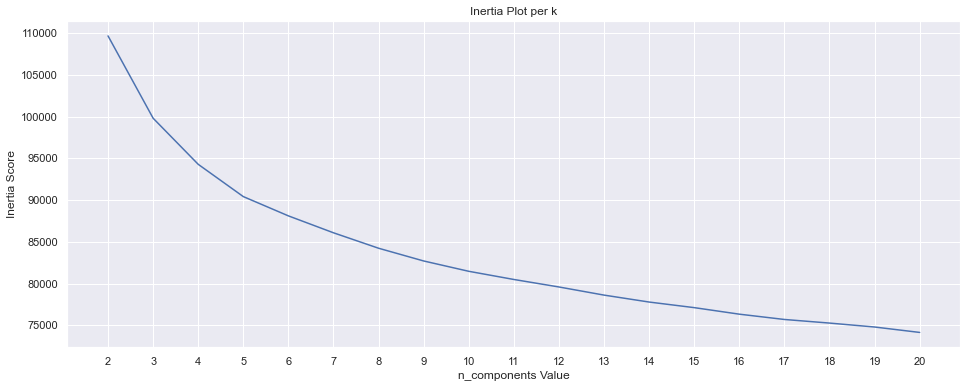

In [37]:
# Re - Running Kmeans on "new" data

X_train = new_raw_data[new_features].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='horizontal')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

**Conclusion:**

The intertia improved vs the initial run before PCA and Vs the PCA run - Now we want to apply both

**Running PCA on New Dataset after grouping**

Explained variance ratio (first two components): [0.198686 0.088642]
The total percentage of explanation of the dataset by first two components: 0.2873282166787477


<Figure size 576x432 with 0 Axes>

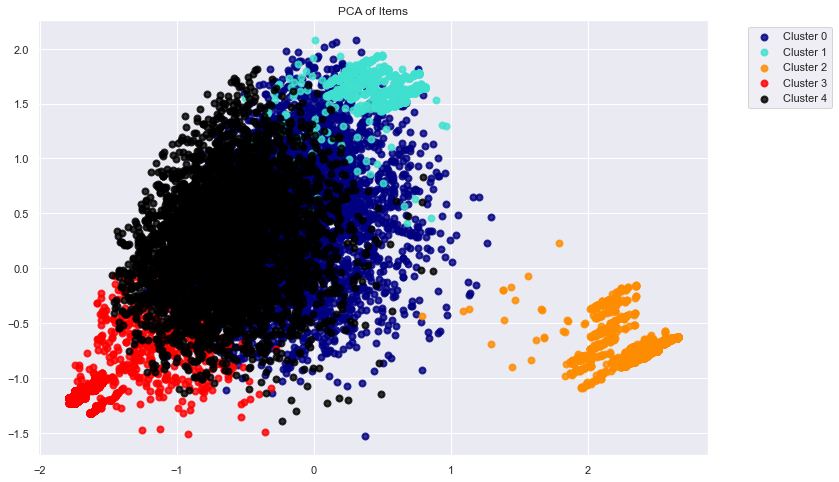

In [38]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))
print('The total percentage of explanation of the dataset by first two components: %s' % sum(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

Total Variance in our dataset is:  8.901123897676959
The 95% variance we want to have is:  8.45606770279311

Variance explain with 30 n_compononets:  7.684924243875576
Variance explain with 35 n_compononets:  8.060841744219564
Variance explain with 36 n_compononets:  8.128804366832435
Variance explain with 40 n_compononets:  8.372368388631433
Variance explain with 41 n_compononets:  8.42353247206675
Variance explain with 42 n_compononets:  8.474468575418356


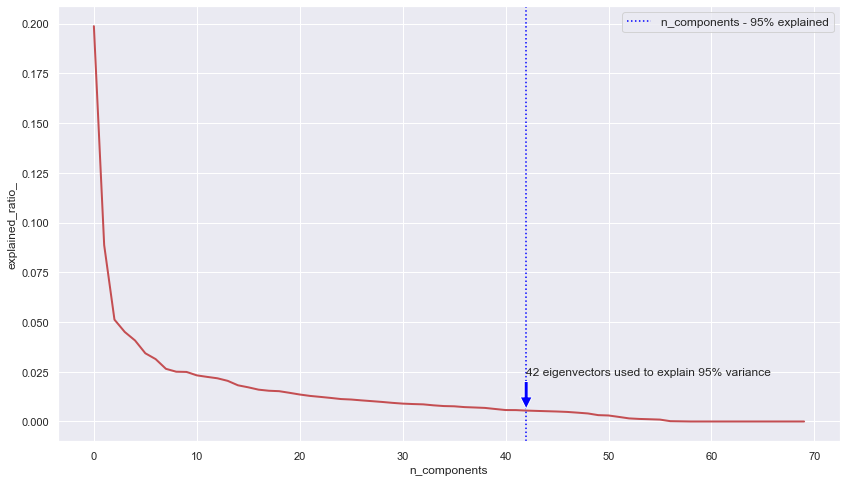

In [39]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 36 n_compononets: ", sum(a["Explained Variance"][0:36]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 42 n_compononets: ", sum(a["Explained Variance"][0:42]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(42,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('42 eigenvectors used to explain 95% variance', xy=(42, pca.explained_variance_ratio_[42]), xytext=(42, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 103361.01215287819
The innertia for : 3 Clusters is: 93502.84509653276
The innertia for : 4 Clusters is: 87989.24300430091
The innertia for : 5 Clusters is: 84130.79686745211
The innertia for : 6 Clusters is: 81892.71306136088
The innertia for : 7 Clusters is: 79680.9407034828
The innertia for : 8 Clusters is: 77927.6925526007
The innertia for : 9 Clusters is: 76770.91019443041
The innertia for : 10 Clusters is: 75228.11197678461
The innertia for : 11 Clusters is: 74167.25831045295
The innertia for : 12 Clusters is: 73363.97341463735
The innertia for : 13 Clusters is: 72393.09008537196
The innertia for : 14 Clusters is: 71574.35491493027
The innertia for : 15 Clusters is: 70818.13299756496
The innertia for : 16 Clusters is: 70063.05680697224
The innertia for : 17 Clusters is: 69604.65660604737
The innertia for : 18 Clusters is: 68861.20987142573
The innertia for : 19 Clusters is: 68473.19331731964
The innertia for : 20 Clusters is: 68037.77597188673


Text(0.5, 1.0, 'Inertia Plot per k')

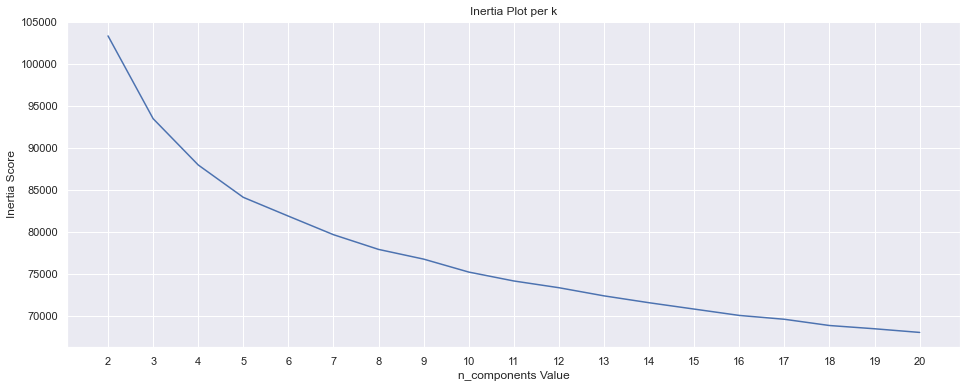

In [40]:
# Running PCA again

pca = PCA(n_components=42, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='horizontal')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

**Running Kmeans with 5 clusters and using a PCA dataset with 36 components**

In [41]:
# Running PCA with 36 PC
pca = PCA(n_components=36, random_state = 453)
X_r = pca.fit(X).transform(X)

# Running Kmeans with 5 Ks
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

# Attachine the clusters back to our initial Dataset that has all the data
df['Clusters'] = clusters

# Creating a cluster Category
df['Clusters Category'] = 'No Data'
df['Clusters Category'].loc[df['Clusters'] == 0] = 'Cluster 1'
df['Clusters Category'].loc[df['Clusters'] == 1] = 'Cluster 2'
df['Clusters Category'].loc[df['Clusters'] == 2] = 'Cluster 3'
df['Clusters Category'].loc[df['Clusters'] == 3] = 'Cluster 4'
df['Clusters Category'].loc[df['Clusters'] == 4] = 'Cluster 5'

df.head(5)

C:\Users\Tuta\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Tuta\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Tuta\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,Unnamed: 0,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,...,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?,Event Lat,Event Lon,Distance from Event,Clusters,Clusters Category
0,0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,...,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree,51.5073,0.1657,34.342502,2,Cluster 3
1,1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,...,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree,51.5073,0.1657,41.376761,0,Cluster 1
2,2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,...,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree,51.5073,0.1657,701.484783,0,Cluster 1
3,3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,...,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree,51.5073,0.1657,176.943287,1,Cluster 2
4,4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,...,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree,51.5073,0.1657,17.216110,4,Cluster 5


In [42]:
df.columns

Index(['Unnamed: 0', 'CUSTOMER', 'Age', 'Gender', 'Postcode', 'District',
       'Constituency', 'latitude', 'longitude', 'Current_Status',
       'Total_Household_Income',
       'How often you attend Entertaining events in a year?', 'Social_Media',
       'How many hours are you willing to travel to attend an event?',
       'Do you enjoy adrenaline-rush activities?',
       'Are food areas, coffee areas, bars & toilets important to you?',
       'What is your favourite attraction from below:',
       'Were you satisfied with the last event you attended with us?',
       'Would you recommend our events to other people?',
       'Did you find our events value for money?', 'Event Lat', 'Event Lon',
       'Distance from Event', 'Clusters', 'Clusters Category'],
      dtype='object')

In [43]:
# Creating an order for Household Income

df['Household Income Order'] = 0
df['Household Income Order'].loc[df['Total_Household_Income'] == 'Less than 20,000'] = 1
df['Household Income Order'].loc[df['Total_Household_Income'] == '20,000 to 34,999'] = 2
df['Household Income Order'].loc[df['Total_Household_Income'] == '35,000 to 49,999'] = 3
df['Household Income Order'].loc[df['Total_Household_Income'] == '50,000 to 74,999'] = 4
df['Household Income Order'].loc[df['Total_Household_Income'] == '75,000 to 99,999'] = 5
df['Household Income Order'].loc[df['Total_Household_Income'] == '100,000 to 149,999'] = 6
df['Household Income Order'].loc[df['Total_Household_Income'] == '150,000 to 199,999'] = 7
df['Household Income Order'].loc[df['Total_Household_Income'] == '200,000 or more'] = 8

# Replacing apostrophe from columns names
df['Social_Media'] = df['Social_Media'].str.replace("'","")

# Creating an order for Social Media Time Spend
df['Social Media Time Spend Order'] = 0
df['Social Media Time Spend Order'].loc[df['Social_Media'] == 'I dont spend any time at all'] = 1
df['Social Media Time Spend Order'].loc[df['Social_Media'] == 'Up to 1 hour'] = 2
df['Social Media Time Spend Order'].loc[df['Social_Media'] == 'Up to 2 hours'] = 3
df['Social Media Time Spend Order'].loc[df['Social_Media'] == 'Half a day'] = 4
df['Social Media Time Spend Order'].loc[df['Social_Media'] == 'More than half a day'] = 5

# Creating an order for food_areas_coffee_areas_bars_toilets that have Entirely Agree, etc..
df['food_areas_coffee_areas_bars_toilets Agree Order'] = 0
df['food_areas_coffee_areas_bars_toilets Agree Order'].loc[df['Are food areas, coffee areas, bars & toilets important to you?'] == 'Entirely agree'] = 1
df['food_areas_coffee_areas_bars_toilets Agree Order'].loc[df['Are food areas, coffee areas, bars & toilets important to you?'] == 'Mostly agree'] = 2
df['food_areas_coffee_areas_bars_toilets Agree Order'].loc[df['Are food areas, coffee areas, bars & toilets important to you?'] == 'Somewhat agree'] = 3
df['food_areas_coffee_areas_bars_toilets Agree Order'].loc[df['Are food areas, coffee areas, bars & toilets important to you?'] == 'Neither agree nor disagree'] = 4
df['food_areas_coffee_areas_bars_toilets Agree Order'].loc[df['Are food areas, coffee areas, bars & toilets important to you?'] == 'Somewhat disagree'] = 5
df['food_areas_coffee_areas_bars_toilets Agree Order'].loc[df['Are food areas, coffee areas, bars & toilets important to you?'] == 'Mostly disagree'] = 6
df['food_areas_coffee_areas_bars_toilets Agree Order'].loc[df['Are food areas, coffee areas, bars & toilets important to you?'] == 'Entirely disagree'] = 7

# Creating an order for do_you_enjoy_adrenaline_rush_activities
df['enjoy_adrenaline_rush_activities Agree Order'] = 0
df['enjoy_adrenaline_rush_activities Agree Order'].loc[df['Do you enjoy adrenaline-rush activities?'] == 'Entirely agree'] = 1
df['enjoy_adrenaline_rush_activities Agree Order'].loc[df['Do you enjoy adrenaline-rush activities?'] == 'Mostly agree'] = 2
df['enjoy_adrenaline_rush_activities Agree Order'].loc[df['Do you enjoy adrenaline-rush activities?'] == 'Somewhat agree'] = 3
df['enjoy_adrenaline_rush_activities Agree Order'].loc[df['Do you enjoy adrenaline-rush activities?'] == 'Neither agree nor disagree'] = 4
df['enjoy_adrenaline_rush_activities Agree Order'].loc[df['Do you enjoy adrenaline-rush activities?'] == 'Somewhat disagree'] = 5
df['enjoy_adrenaline_rush_activities Agree Order'].loc[df['Do you enjoy adrenaline-rush activities?'] == 'Mostly disagree'] = 6
df['enjoy_adrenaline_rush_activities Agree Order'].loc[df['Do you enjoy adrenaline-rush activities?'] == 'Entirely disagree'] = 7

# Creating an order for were_you_satisfied_with_the_last_event_you_attended_with_us
df['Satisfied Agree Order'] = 0
df['Satisfied Agree Order'].loc[df['Were you satisfied with the last event you attended with us?'] == 'Entirely agree'] = 1
df['Satisfied Agree Order'].loc[df['Were you satisfied with the last event you attended with us?'] == 'Mostly agree'] = 2
df['Satisfied Agree Order'].loc[df['Were you satisfied with the last event you attended with us?'] == 'Somewhat agree'] = 3
df['Satisfied Agree Order'].loc[df['Were you satisfied with the last event you attended with us?'] == 'Neither agree nor disagree'] = 4
df['Satisfied Agree Order'].loc[df['Were you satisfied with the last event you attended with us?'] == 'Somewhat disagree'] = 5
df['Satisfied Agree Order'].loc[df['Were you satisfied with the last event you attended with us?'] == 'Mostly disagree'] = 6
df['Satisfied Agree Order'].loc[df['Were you satisfied with the last event you attended with us?'] == 'Entirely disagree'] = 7

# Creating an order for did_you_find_our_events_value_for_money
df['Value_for_money Agree Order'] = 0
df['Value_for_money Agree Order'].loc[df['Did you find our events value for money?'] == 'Entirely agree'] = 1
df['Value_for_money Agree Order'].loc[df['Did you find our events value for money?'] == 'Mostly agree'] = 2
df['Value_for_money Agree Order'].loc[df['Did you find our events value for money?'] == 'Somewhat agree'] = 3
df['Value_for_money Agree Order'].loc[df['Did you find our events value for money?'] == 'Neither agree nor disagree'] = 4
df['Value_for_money Agree Order'].loc[df['Did you find our events value for money?'] == 'Somewhat disagree'] = 5
df['Value_for_money Agree Order'].loc[df['Did you find our events value for money?'] == 'Mostly disagree'] = 6
df['Value_for_money Agree Order'].loc[df['Did you find our events value for money?'] == 'Entirely disagree'] = 7


# Creating an order for would_you_recommend_our_events_to_other_people
df['Recommend Order'] = 0
df['Recommend Order'].loc[df['Would you recommend our events to other people?'] == 'Very Likely'] = 1
df['Recommend Order'].loc[df['Would you recommend our events to other people?'] == 'Mostly Likely'] = 2
df['Recommend Order'].loc[df['Would you recommend our events to other people?'] == 'Somewhat Likely'] = 3
df['Recommend Order'].loc[df['Would you recommend our events to other people?'] == 'Neither agree nor disagree'] = 4
df['Recommend Order'].loc[df['Would you recommend our events to other people?'] == 'Somewhat Unlikely'] = 5
df['Recommend Order'].loc[df['Would you recommend our events to other people?'] == 'Mostly Unlikely'] = 6
df['Recommend Order'].loc[df['Would you recommend our events to other people?'] == 'Very Unlikely'] = 7

C:\Users\Tuta\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [44]:
os. getcwd()

'C:\\Users\\Tuta\\Documents\\Biblioteca do Engenheiro\\Linguagem Computacional\\Python\\Data science'

In [45]:
# Exporting the data in a CSV

df.to_csv(r'C:\\Users\\Tuta\\Documents\\Biblioteca do Engenheiro\\Linguagem Computacional\\Python\\Data science\\Cluster de Clientes\\Cluster Output.csv', sep='\t', index=False)
df.head()

,Unnamed: 0,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,...,Distance from Event,Clusters,Clusters Category,Household Income Order,Social Media Time Spend Order,food_areas_coffee_areas_bars_toilets Agree Order,enjoy_adrenaline_rush_activities Agree Order,Satisfied Agree Order,Value_for_money Agree Order,Recommend Order
0,0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,...,34.342502,2,Cluster 3,4,2,1,7,3,5,5
1,1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,...,41.376761,0,Cluster 1,3,2,1,5,2,7,3
2,2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,...,701.484783,0,Cluster 1,5,1,3,5,2,7,6
3,3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,...,176.943287,1,Cluster 2,3,4,4,1,3,5,3
4,4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,...,17.216110,4,Cluster 5,6,2,4,6,1,1,7
